In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
import EM_algo as em

### We sample a set of observations according to a Gaussian mixture law

In [3]:
m1 = 2
d = 2
Alpha = np.random.uniform(0,1,(m1,1))
Alpha = Alpha/np.sum(Alpha)
Mu = np.array([[30,15],[40,15]])

Sigma = np.zeros((m1,d,d))
for j in range(m1):
	Sigma_j = np.zeros((d,d))
	while np.any(np.linalg.eigvals(Sigma_j) <= 0):
		Sigma_inv = np.random.uniform(-0.2,0.2,(d,d))
		Sigma_j = np.linalg.inv((Sigma_inv + Sigma_inv.T)/2)
	Sigma[j,:,:] = Sigma_j

Unif_GMM = np.random.uniform(0,80,(2,6000))
Proba_GMM = em.Gaussian_mixture_law(Unif_GMM,Mu,Sigma,Alpha)
Proba_GMM = Proba_GMM/np.sum(Proba_GMM)

Data_GMM = em.random_var(Unif_GMM,Proba_GMM,200)


### We check the the sum of the sum of the distances between the points and their respective barycenters decreases at each iterations.

In [ ]:
Tau_GMM, Sum_GMM = em.Kmeans(Data_GMM,3)
plt.figure(figsize=(9,5))
plt.plot(np.arange(len(Sum_GMM)),Sum_GMM)
plt.xlabel('Iterations')
plt.ylabel('Sum of distances')
plt.title('Sum of the distances between the points and their respective barycenters')
plt.show()

### We test the EM algorithm on Data_GMM

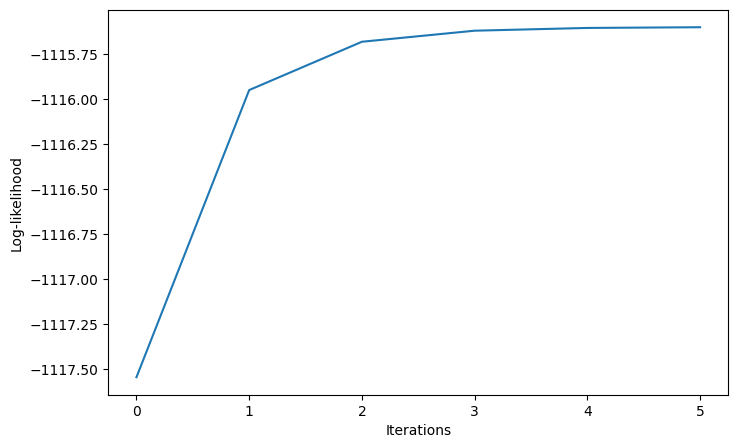

In [5]:
EM_GMM = em.EM(Data_GMM,2)
Alpha_EM, Mu_EM, Sigma_EM = EM_GMM['Pi'], EM_GMM['Mu'], EM_GMM['Sigma']
Log_like = EM_GMM['Log-likelihood']
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(Log_like)),Log_like)
plt.xlabel('Iterations')
plt.ylabel('Log-likelihood')
plt.show()

The log-likelihood increases at each iteration and quickly reaches a plateau !

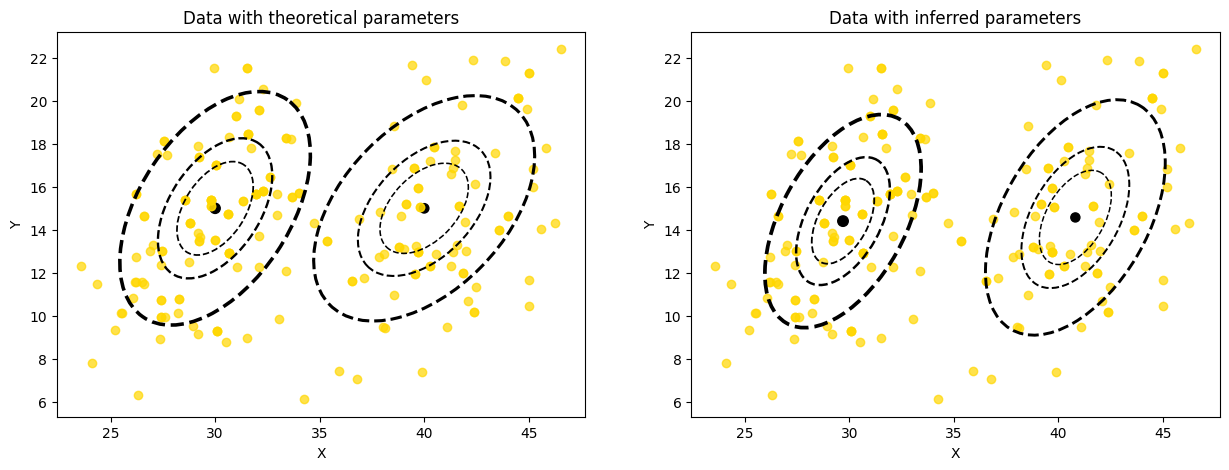

In [6]:
fig, (ax1,ax2)  = plt.subplots(1,2,figsize=(15,5))
em.plot_graph_EM(Data_GMM,Mu,Sigma,Alpha,ax1)
ax1.set(title = 'Data with theoretical parameters',xlabel='X',ylabel= 'Y')
em.plot_graph_EM(Data_GMM,Mu_EM,Sigma_EM,Alpha_EM,ax2)
ax2.set(title = 'Data with inferred parameters',xlabel='X',ylabel= 'Y')
plt.show()